In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import json
import larp
import numpy as np

In [2]:
with open("test\data.rgj") as file:
        rgjs:list = json.load(file)
    
field = larp.PotentialField(size=(100, 100), rgjs=rgjs)

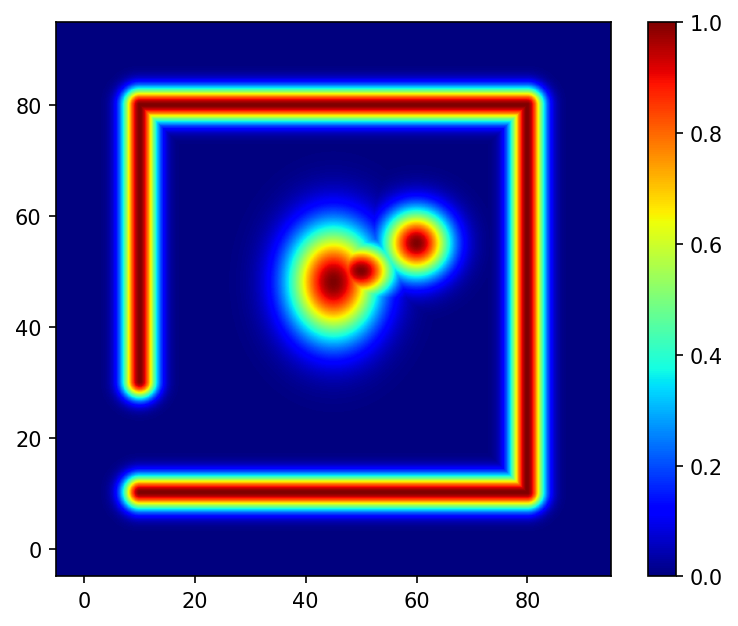

In [3]:
display = field.to_image(resolution=400, center_point=[45, 45])

plt.figure(dpi=150)
plt.imshow(display, cmap='jet', extent=field.get_extent())
plt.colorbar()
plt.clim(0.0,1.0)
plt.show()

In [4]:
edges = [0.2, 0.4, 0.6, 0.8]
quad_tree = larp.quad.QuadTree(field, minimum_sector_length=2, maximum_sector_length=10, boundaries=edges)
quad_tree.build()

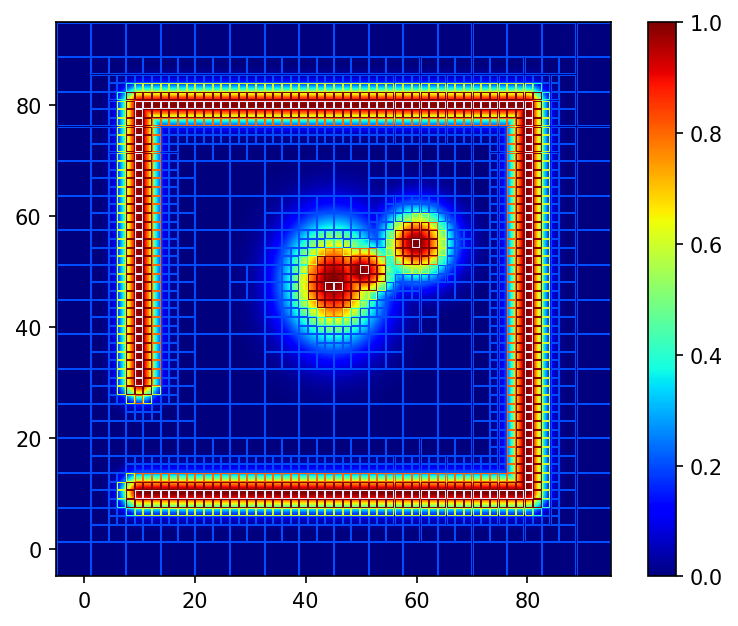

In [5]:
boundaries_lines = quad_tree.to_boundary_lines_collection(margin=0.1)
boundaries_lines_zones = quad_tree.get_quad_zones()


plt.figure(dpi=150)
plt.imshow(display, cmap='jet', extent=field.get_extent())
plt.colorbar().set_ticks([0.0] + edges + [1.0])
for i in range(0, len(boundaries_lines), 2):
    zone = boundaries_lines_zones[i//2]
    c = cm.jet(quad_tree.ZONEToMaxRANGE[zone]) if zone > 0 else "#e4ebff"
    plt.plot(*boundaries_lines[i:i+2], c=c, alpha=1, linewidth=0.5)
plt.show()

In [6]:
routing_graph = larp.graph.RouteGraph(quad_tree=quad_tree, build_graph=True)

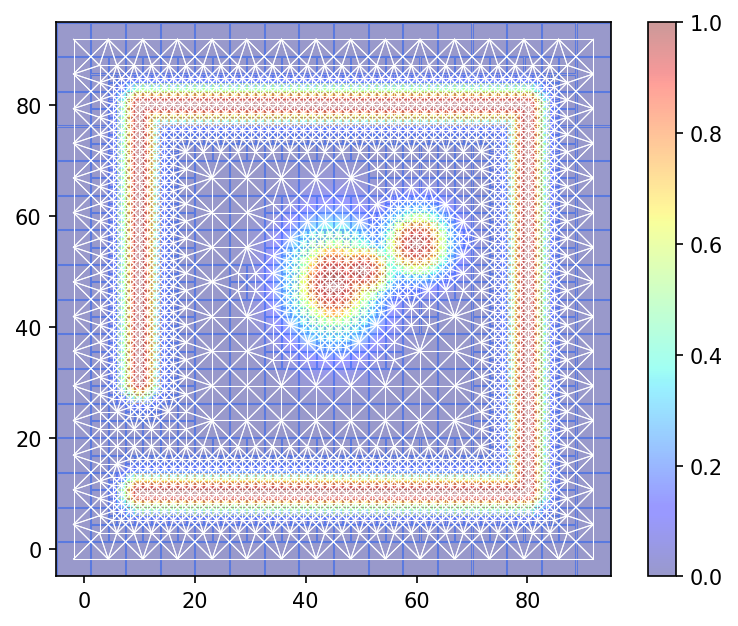

In [7]:
routes_lines = routing_graph.to_routes_lines_collection()

plt.figure(dpi=150)
plt.imshow(display, cmap='jet', extent=field.get_extent(), alpha=0.4)
plt.colorbar().set_ticks([0.0] + edges + [1.0])
for i in range(0, len(boundaries_lines), 2):
    zone = boundaries_lines_zones[i//2]
    c = cm.jet(quad_tree.ZONEToMaxRANGE[zone]) if zone > 0 else "#e4ebff"
    plt.plot(*boundaries_lines[i:i+2], c=c, alpha=0.4, linewidth=0.5)
plt.plot(*routes_lines, color="#fff", alpha=1.0, linewidth=0.5)
plt.show()

In [8]:
start = (-1, 35) # (x, y)
end = (62, 55)

route = routing_graph.find_route(start, end, scale_tranform=lambda x: 1/(1.0 - x + 0.000001), alg="A*")
print(f"Route found: {route is not None}")

Route found: True


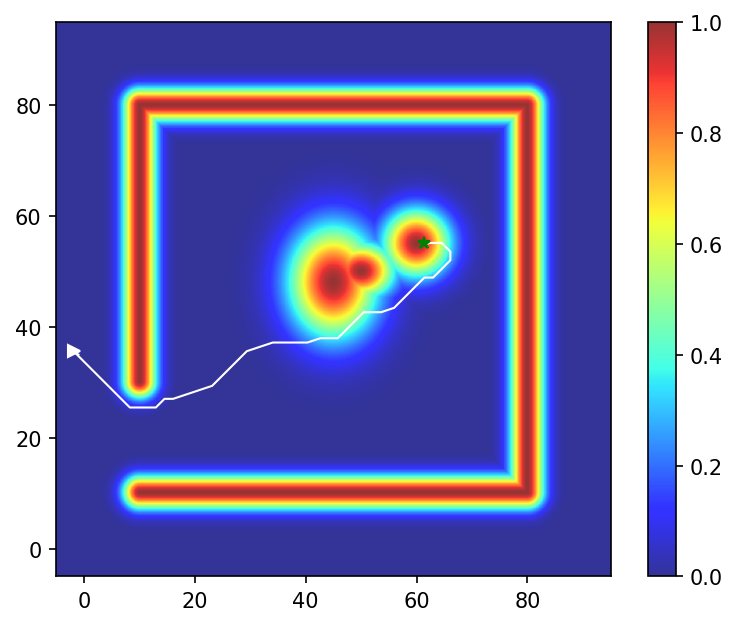

In [12]:
route_path = larp.graph.RouteGraph.route_to_lines_collection(start, end, route, remapped=True)

plt.figure(dpi=150)
plt.imshow(display, cmap='jet', extent=field.get_extent(), alpha=0.8)
plt.colorbar().set_ticks([0.0] + edges + [1.0])
plt.plot(route_path[:, 0], route_path[:, 1], color="#fff", alpha=1.0, linewidth=1.0)
plt.plot(route[0].center_point[0], route[0].center_point[1], 'w>')
plt.plot(route[-1].center_point[0], route[-1].center_point[1], 'g*')
plt.show()

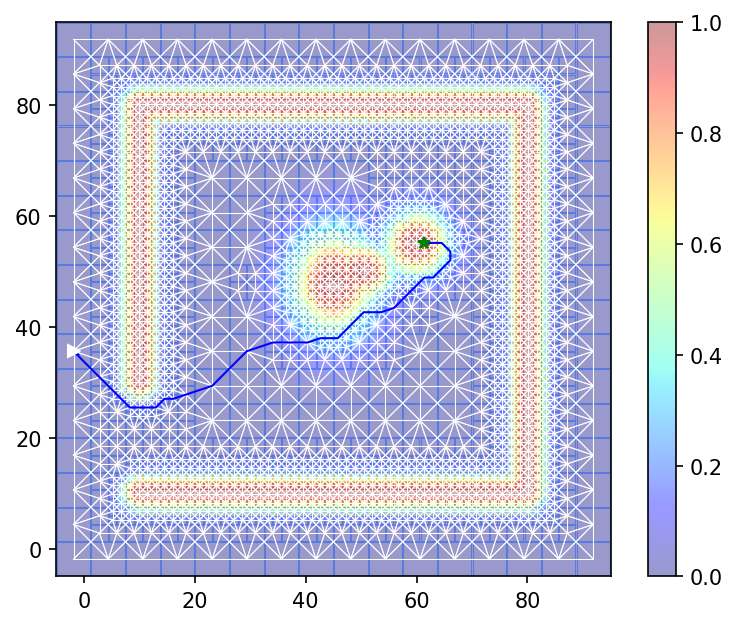

In [10]:
plt.figure(dpi=150)
plt.imshow(display, cmap='jet', extent=field.get_extent(), alpha=0.4)
plt.colorbar().set_ticks([0.0] + edges + [1.0])
for i in range(0, len(boundaries_lines), 2):
    zone = boundaries_lines_zones[i//2]
    c = cm.jet(quad_tree.ZONEToMaxRANGE[zone]) if zone > 0 else "#e4ebff"
    plt.plot(*boundaries_lines[i:i+2], c=c, alpha=0.4, linewidth=0.5)
plt.plot(*routes_lines, color="#fff", alpha=0.9, linewidth=0.5)
plt.plot(route_path[:, 0], route_path[:, 1], color="#0000ff", alpha=1.0, linewidth=1.0)
plt.plot(route[0].center_point[0], route[0].center_point[1], 'w>')
plt.plot(route[-1].center_point[0], route[-1].center_point[1], 'g*')
plt.show()

In [11]:
# Distance traveled
dist = larp.route_distance(route_path)
print(f"Distance traveled: {dist}")

# Area under route
area = field.estimate_route_area(route_path, step=1e-4)
print(f"Total area under route: {area}")

# Average area under route
avg_area = area/dist
print(f"Average area under route: {avg_area}")

# Area under route (scaled to infinity via 1/(x-1))
area = field.estimate_route_area(route_path, step=1e-4, scale_transform=lambda x: 1/(1.0 - x + 1e-10)-1)
print(f"Total area under route (scaled): {area}")

# Average area under route (scaled to infinity via 1/(x-1))
avg_area = area/dist
print(f"Average area under route (scaled): {avg_area}")

Distance traveled: 90.38684421230549
Total area under route: 15.760368320070322
Average area under route: 0.17436573272822226
Total area under route (scaled): 43.03340898392198
Average area under route (scaled): 0.47610257177297605
